<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Kears_Tensorflow_Theano_PyTorch_Cntk(Microsoft_Cognitive_Toolkit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras**

Keras is an open-source library that provides a Python interface for artificial neural networks. Keras was first independent software, then integrated into the TensorFlow library, and later supporting more.

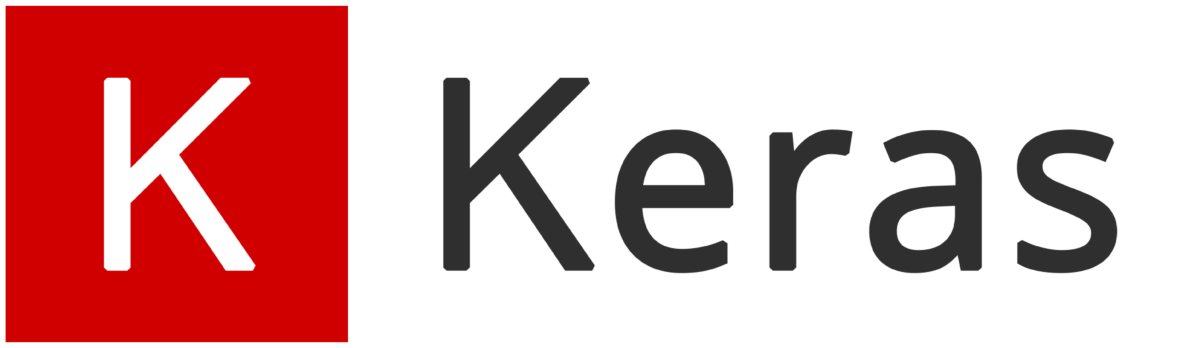

# **TensorFlow**
 is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks

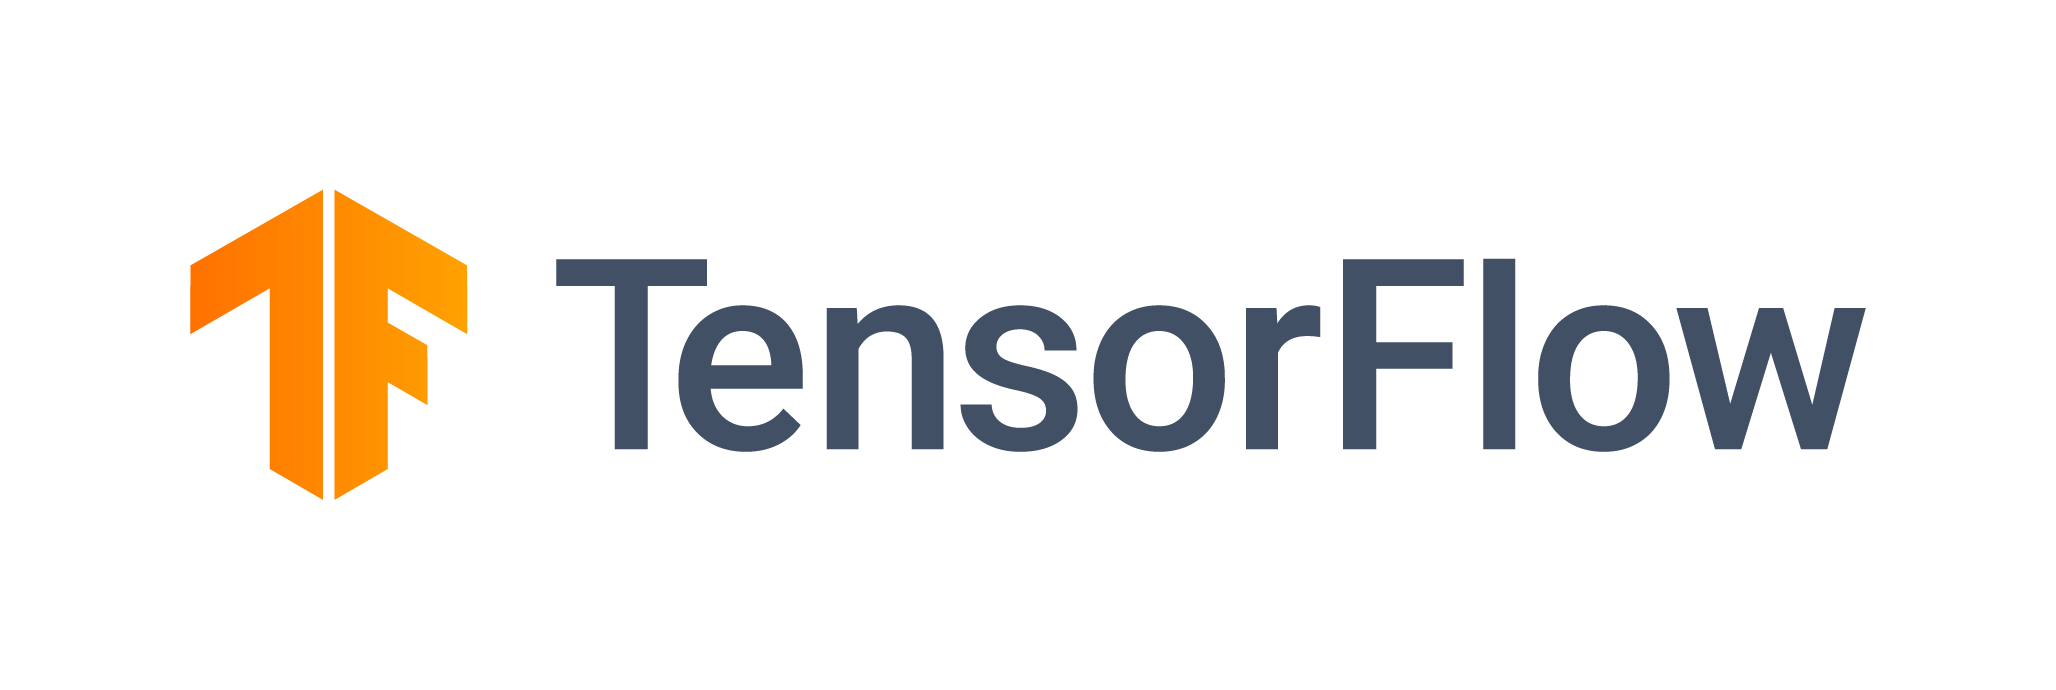

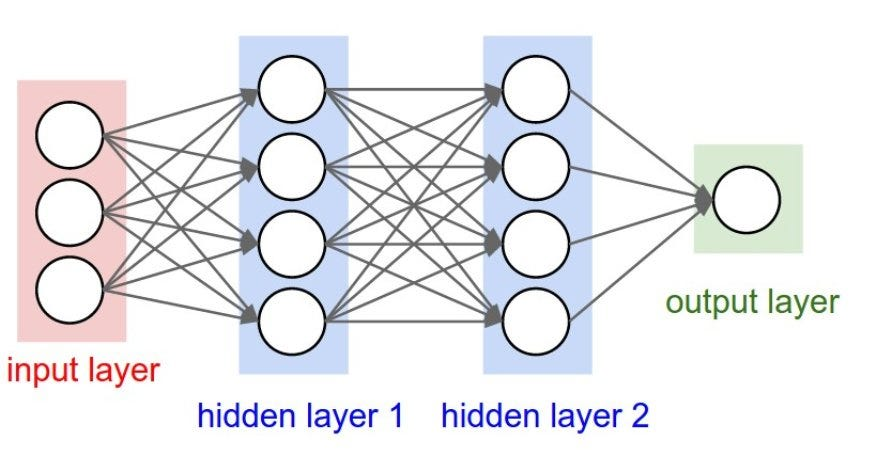

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.2984 - loss: 1.8732 - val_accuracy: 0.5198 - val_loss: 1.3258
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.5435 - loss: 1.2790 - val_accuracy: 0.5891 - val_loss: 1.1436
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.6113 - loss: 1.1033 - val_accuracy: 0.6207 - val_loss: 1.0735
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6491 - loss: 0.9950 - val_accuracy: 0.6435 - val_loss: 1.0232
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.6782 - loss: 0.9180 - val_accuracy: 0.6712 - val_loss: 0.9342
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7059 - loss: 0.8500 - val_accuracy: 0.6929 - val_loss: 0.8857
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.7194 - loss: 0.8002 - val_accuracy: 0.6696 - val_loss: 0.9447
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.7289 - loss: 0.7683 

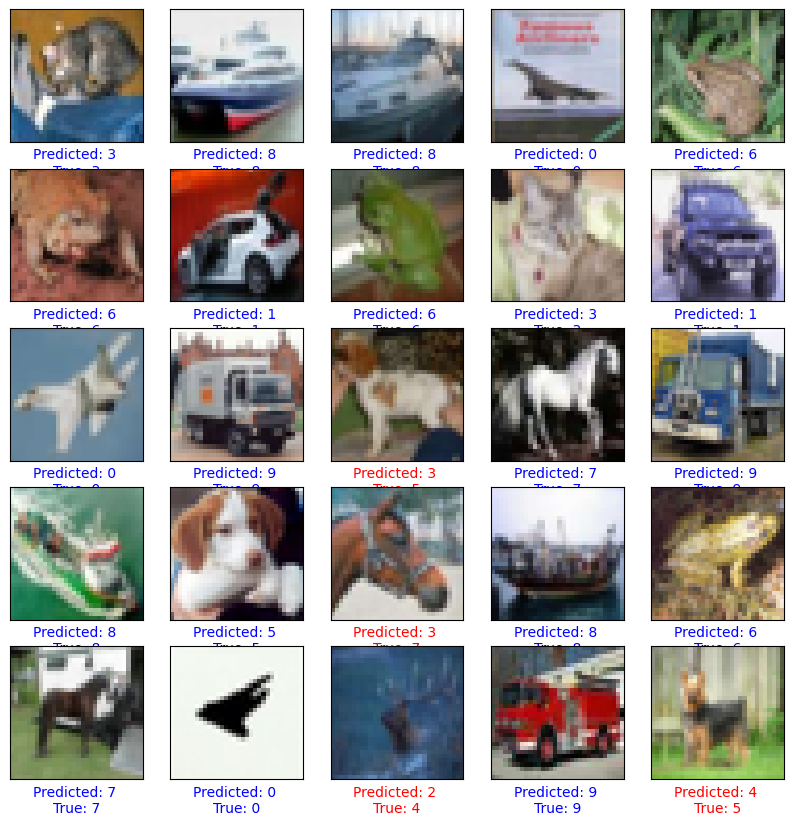

In [ ]:
# prompt: cnn image classification using keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(x_test)

# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("Predicted: {} \nTrue: {}".format(predicted_label, true_label), color=color)
plt.show()

# **Here’s a real-world example using Keras in a healthcare context,**
 specifically for predicting the onset of diabetes using a neural network. We’ll build a simple neural network using the Pima Indians Diabetes dataset from the UCI Machine Learning Repository. This dataset contains medical information, such as the number of pregnancies, BMI, and blood pressure, to predict whether a patient has diabetes.


Steps:

Load the Dataset

Preprocess the Data

Build and Train the Neural Network using Keras

Evaluate the Model

Visualize the Results

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.5835 
Accuracy: 73.38%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


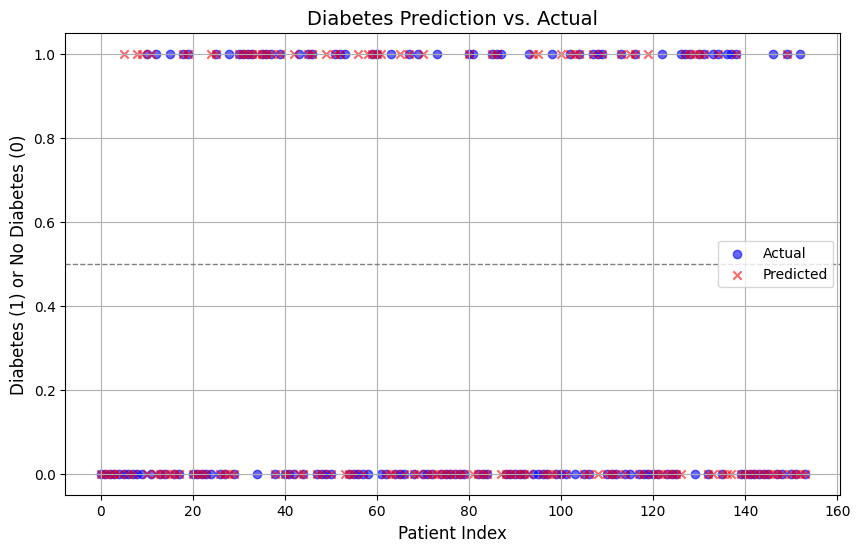

<Figure size 800x600 with 0 Axes>

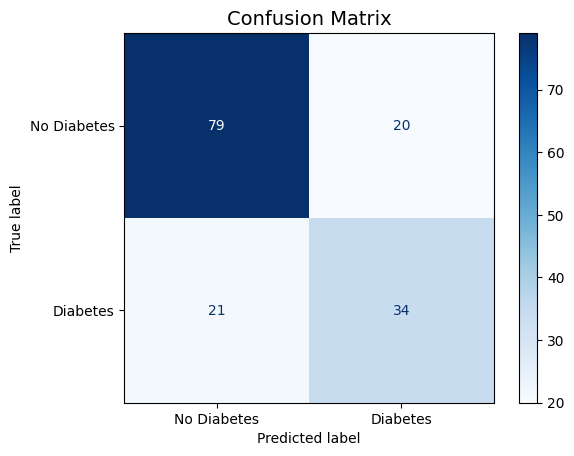

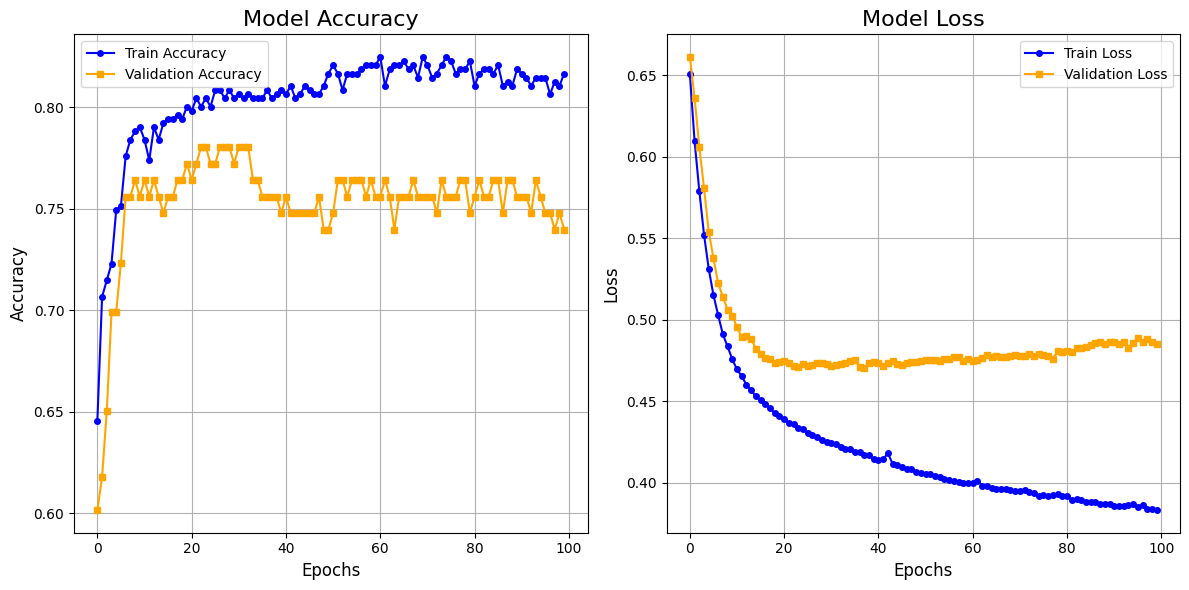

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Read data
data = pd.read_csv(url, names=columns)

# Split data into input features (X) and target variable (y)
X = data.iloc[:, :-1].values  # All rows, all columns except the last
y = data.iloc[:, -1].values   # All rows, only the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset (scale the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Sequential model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))  # First hidden layer with 12 neurons
model.add(Dense(8, activation='relu'))                # Second hidden layer with 8 neurons
model.add(Dense(1, activation='sigmoid'))             # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# 1. Visualize Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue', alpha=0.6)
plt.scatter(range(len(y_test)), predicted_classes, label='Predicted', marker='x', color='red', alpha=0.6)
plt.title('Diabetes Prediction vs. Actual', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Diabetes (1) or No Diabetes (0)', fontsize=12)
plt.axhline(0.5, color='grey', linestyle='--', linewidth=1)  # Decision boundary
plt.legend()
plt.grid()
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# 3. Visualize Training History
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o', markersize=4)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='s', markersize=4)
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o', markersize=4)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='s', markersize=4)
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


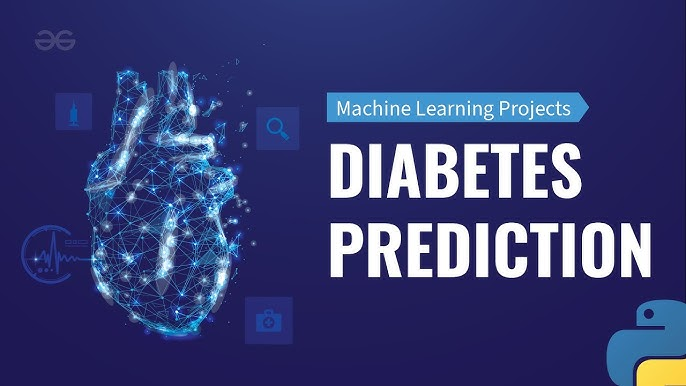

# **Explaination:**
This code is a complete workflow that uses Keras and TensorFlow to build a simple neural network for predicting the onset of diabetes using the Pima Indians Diabetes dataset. Let's break down the different sections:

**1. Importing Libraries:**

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


These libraries are used for:

TensorFlow & Keras: For building and training neural networks.

NumPy and Pandas: For data manipulation.

Matplotlib: For visualizing data.

Scikit-learn: For splitting the data and preprocessing it (scaling).

**2. Loading the Dataset:**

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)


The dataset contains patient medical data with features such as the number of pregnancies, glucose levels, BMI, etc. The Outcome column indicates whether the patient has diabetes (1) or not (0).

The data is loaded from a CSV file using Pandas.

**3. Splitting Data into Features and Labels:**

In [6]:
X = data.iloc[:, :-1].values  # Input features
y = data.iloc[:, -1].values   # Target (Outcome)


X contains all the input features (everything except the last column).

y contains the target variable (the last column, Outcome).

**4. Train-Test Split and Feature Scaling:**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The data is split into training and testing sets, with 80% used for training and 20% for testing.

**StandardScaler** is used to standardize the features, scaling them to have a mean of 0 and a standard deviation of 1, which helps with faster convergence in training.

**5. Building the Neural Network:**

In [8]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))  # Hidden layer 1
model.add(Dense(8, activation='relu'))                # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))             # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A Sequential model is used to stack layers.

The first hidden layer has 12 neurons with the ReLU activation function.

The second hidden layer has 8 neurons, also with ReLU activation.

The output layer has 1 neuron with a sigmoid activation function since this is a binary classification (diabetes or not).

**6. Compiling and Training the Model:**

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)


The model is compiled with:
Binary Crossentropy as the loss function, which is common for binary classification tasks.

Adam optimizer, which is efficient and widely used.

Accuracy as the evaluation metric.

The model is trained for 100 epochs with a batch size of 10. A portion of the training data (20%) is used for validation to monitor overfitting.


7. Evaluating the Model:

In [10]:
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.6003 
Accuracy: 71.42857313156128%


The model is evaluated on the test data, and its accuracy is printed. This gives an idea of how well the model generalizes to unseen data.

**8. Making Predictions:**

In [11]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


The model predicts the probability of each test instance being diabetic. Probabilities greater than 0.5 are classified as having diabetes (1), and those less are classified as not having diabetes (0).

**9. Visualizing Predictions vs Actual:**

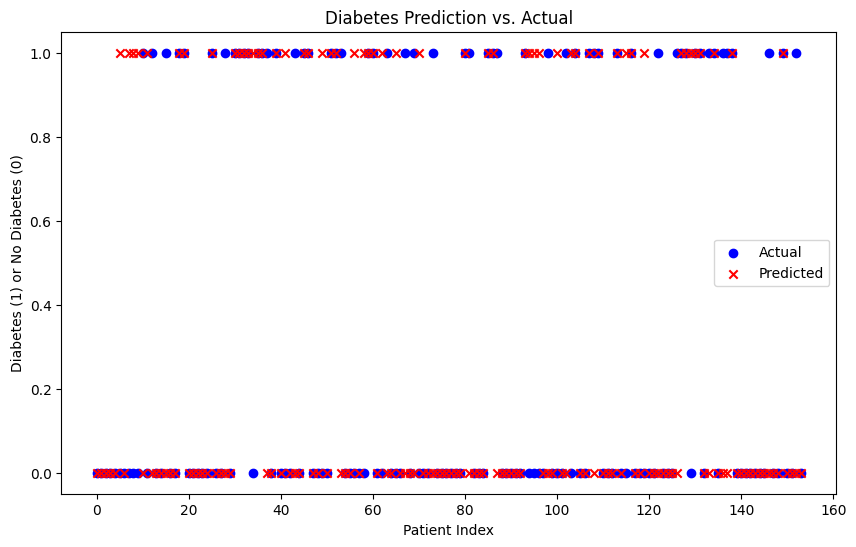

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
plt.scatter(range(len(y_test)), predicted_classes, label='Predicted', marker='x', color='red')
plt.title('Diabetes Prediction vs. Actual')
plt.xlabel('Patient Index')
plt.ylabel('Diabetes (1) or No Diabetes (0)')
plt.legend()
plt.show()


A scatter plot is used to compare the actual outcomes and the model’s predictions. The y_test values are the actual outcomes, and the predicted_classes are the model's predictions.

# 10. Visualizing Training History:

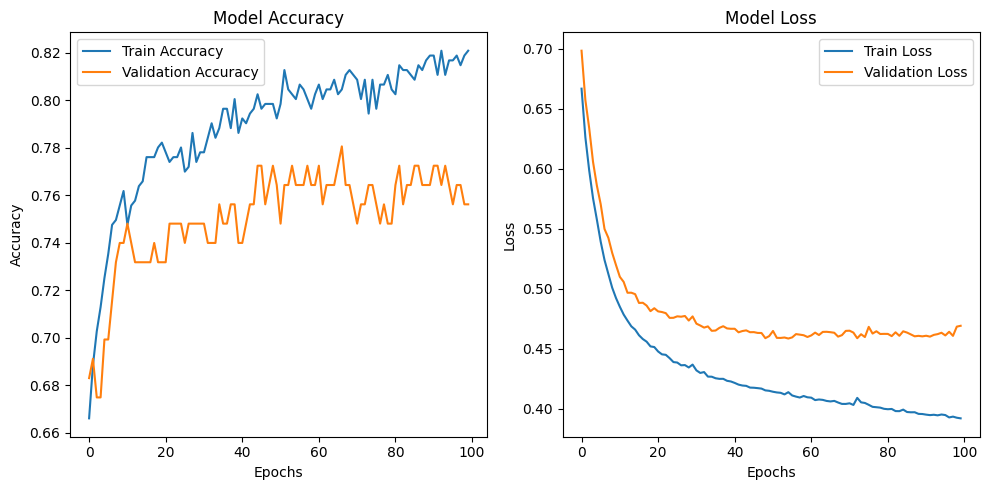

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


The training process is visualized by plotting both:

Training and Validation Accuracy over the epochs.

Training and Validation Loss over the epochs.

These plots help in diagnosing whether the model is learning well or overfitting.

**Summary:**

The model successfully predicts diabetes with a neural network.

Visualization of the training process and predictions helps in understanding the model's performance. The model's accuracy and loss during training and validation are plotted to assess its learning behavior.

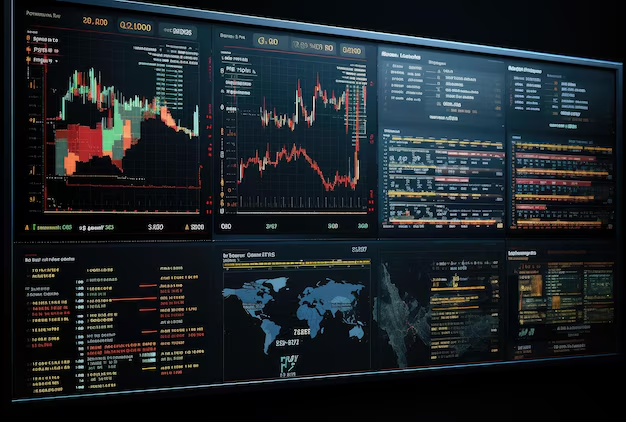

# **Stock Market Prediction**
A real-world example of stock market prediction using PyTorch could involve building a simple Recurrent Neural Network (RNN) or Long Short-Term Memory (LSTM) network to predict future stock prices based on historical data. Here, we'll use an LSTM model due to its effectiveness in capturing long-term dependencies in time series data, which is crucial for stock market predictions.

Steps:
Load Stock Market Data

Preprocess the Data

Build the LSTM Model

Train the Model

Evaluate the Model

Visualize Predictions




Let’s walk through this example with code:

**1. Install Required Libraries:**
First, make sure to have yfinance installed for downloading historical stock prices:

**#pip install yfinance**

#**PyTorch**
is a machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella

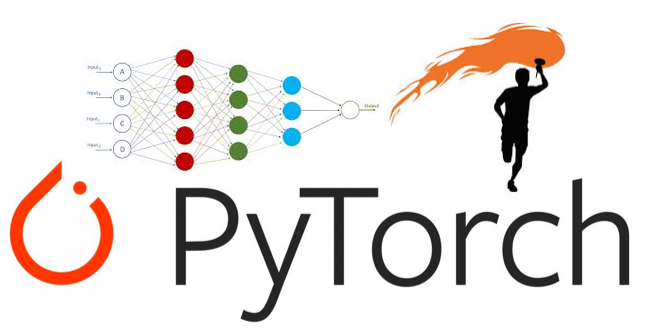

[*********************100%***********************]  1 of 1 completed


Epoch [10/100], Loss: 0.1258
Epoch [20/100], Loss: 0.0797
Epoch [30/100], Loss: 0.0525
Epoch [40/100], Loss: 0.0185
Epoch [50/100], Loss: 0.0055
Epoch [60/100], Loss: 0.0025
Epoch [70/100], Loss: 0.0019
Epoch [80/100], Loss: 0.0013
Epoch [90/100], Loss: 0.0012
Epoch [100/100], Loss: 0.0011


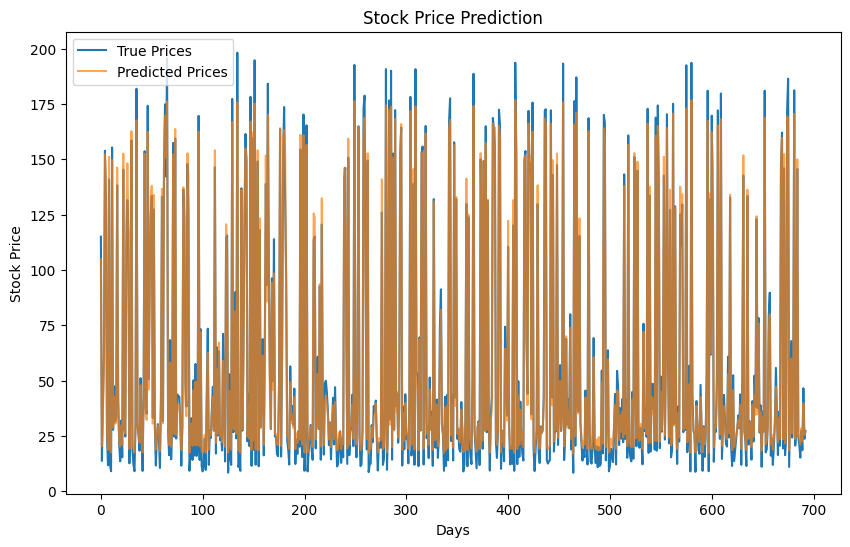

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Download stock data (e.g., Apple Inc.)
df = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

# Use the 'Close' price for prediction
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the dataset: Create sequences of 60 time steps to predict the next time step
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60  # Use 60 previous time steps to predict the next one
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape data into (samples, time steps, features) as required for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensors = torch.Tensor(X_train)
X_test_tensors = torch.Tensor(X_test)
y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)

# Define the LSTM Model
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(StockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 1  # Number of features
hidden_size = 50  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Output size (predicting one value)

# Instantiate the model
model = StockLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensors)
    optimizer.zero_grad()

    # Compute the loss
    loss = criterion(outputs, y_train_tensors.view(-1, 1))

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
predicted = model(X_test_tensors).detach().numpy()

# Rescale the predicted and true values back to original scale
predicted = scaler.inverse_transform(predicted)
y_test_rescaled = scaler.inverse_transform(y_test_tensors.view(-1, 1).numpy())

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='True Prices')
plt.plot(predicted, label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


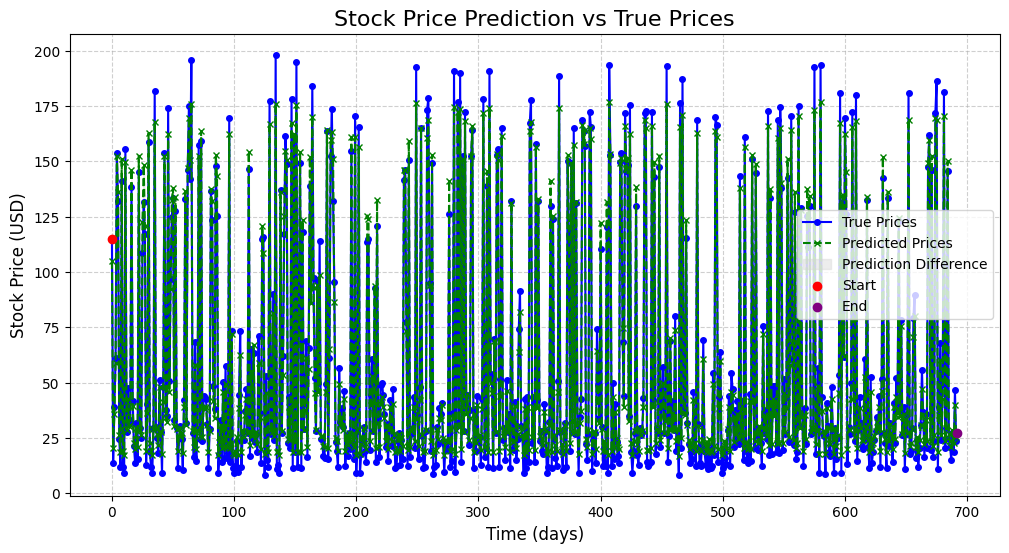

In [16]:
# Plot the results with improvements
plt.figure(figsize=(12, 6))

# Plot the true stock prices
plt.plot(y_test_rescaled, label='True Prices', color='blue', marker='o', markersize=4, linestyle='-', linewidth=1.5)

# Plot the predicted stock prices
plt.plot(predicted, label='Predicted Prices', color='green', marker='x', markersize=4, linestyle='--', linewidth=1.5)

# Adding a shaded region to indicate prediction uncertainty or area between
plt.fill_between(range(len(predicted)), predicted.squeeze(), y_test_rescaled.squeeze(), color='lightgray', alpha=0.4, label='Prediction Difference')

# Highlighting the starting and ending points
plt.scatter(0, y_test_rescaled[0], color='red', label='Start', zorder=5)
plt.scatter(len(y_test_rescaled) - 1, y_test_rescaled[-1], color='purple', label='End', zorder=5)

# Chart title and labels
plt.title('Stock Price Prediction vs True Prices', fontsize=16)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Display legend
plt.legend(loc='best')

# Show the plot
plt.show()


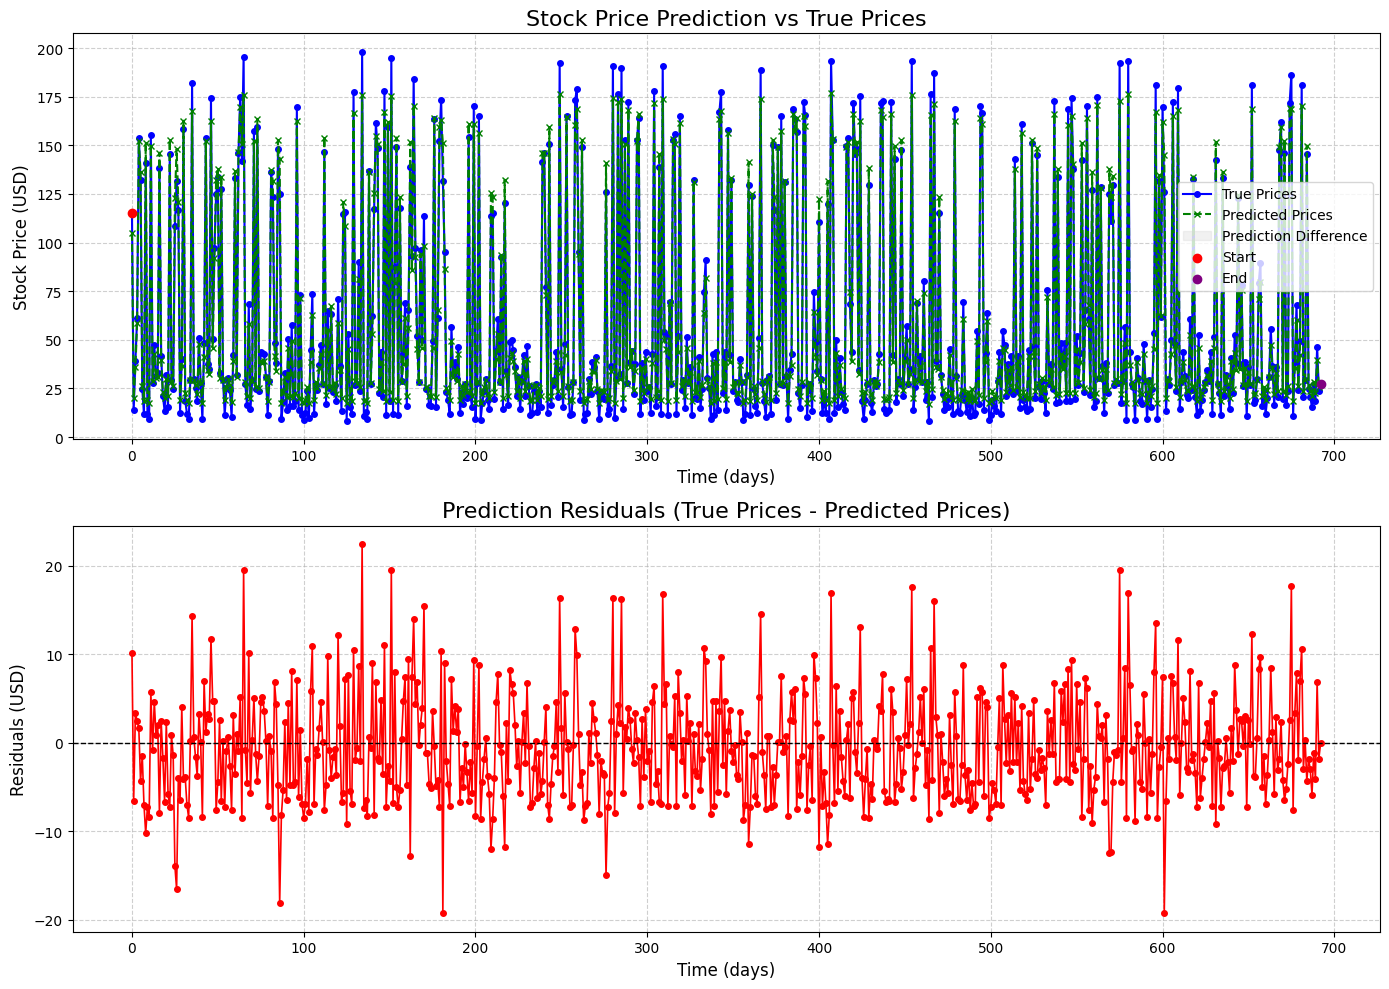

In [17]:
# Plot the results with subplots and residuals
plt.figure(figsize=(14, 10))

# Subplot 1: True vs Predicted Prices
plt.subplot(2, 1, 1)
plt.plot(y_test_rescaled, label='True Prices', color='blue', marker='o', markersize=4, linestyle='-', linewidth=1.5)
plt.plot(predicted, label='Predicted Prices', color='green', marker='x', markersize=4, linestyle='--', linewidth=1.5)
plt.fill_between(range(len(predicted)), predicted.squeeze(), y_test_rescaled.squeeze(), color='lightgray', alpha=0.3, label='Prediction Difference')
plt.scatter(0, y_test_rescaled[0], color='red', label='Start', zorder=5)
plt.scatter(len(y_test_rescaled) - 1, y_test_rescaled[-1], color='purple', label='End', zorder=5)
plt.title('Stock Price Prediction vs True Prices', fontsize=16)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')

# Subplot 2: Residual plot (True Prices - Predicted Prices)
residuals = y_test_rescaled - predicted
plt.subplot(2, 1, 2)
plt.plot(residuals, color='red', marker='o', linestyle='-', linewidth=1.2, markersize=4)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Prediction Residuals (True Prices - Predicted Prices)', fontsize=16)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Residuals (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


**1.	Data Preprocessing:**
o	The data is scaled using MinMaxScaler to bring all values between 0 and 1, which helps the model converge faster.
o	The create_sequences function creates sequences of 60 previous time steps as input (X) to predict the next time step (y).

**2.	PyTorch Tensors:**
o	The dataset is split into training and testing sets (80% for training, 20% for testing), and converted to PyTorch tensors for model training.

**3.	LSTM Model:**
o	A PyTorch LSTM network is defined with 2 layers of LSTM units, followed by a fully connected (dense) layer that outputs a single prediction.

o	The model architecture includes:

	Input layer: accepts the sequence data (time steps).

	LSTM layers: used for capturing dependencies in the time series.

	Fully connected layer: outputs the predicted stock price.

**4.	Training:**
o	The model is trained for 100 epochs using the Adam optimizer. The loss function used is Mean Squared Error (MSE), which measures the difference between predicted and actual values.

**5.	Evaluation:**

o	After training, we evaluate the model on the test data. We use the model’s predictions, and then scale them back to the original values using MinMaxScaler.inverse_transform to get a proper interpretation.

**6.	Visualization:**
o	We plot the true stock prices and the predicted prices to visually compare the model’s performance.

**Summary:**

**•	LSTM** is highly effective for predicting stock prices due to its ability to capture long-term dependencies in time-series data.

•	This example uses historical stock data and an LSTM network to predict future stock prices, showing both the training process and the prediction results with a plot comparing the actual vs. predicted stock prices.



**Explanation:**

Line Styles: The true prices are shown with a solid blue line, and the predicted prices are shown with a dashed green line for easy distinction.

Markers: True prices use circle markers (o), while predicted prices use x markers to visually separate the two.

Shaded Region: The area between the predicted and true values is shaded in light gray to highlight the difference between predictions and actual stock prices.

Key Points: The first and last data points are marked with red and purple points to indicate the start and end of the prediction period.

Gridlines: A grid is added for better readability, making it easier to track values along the axes

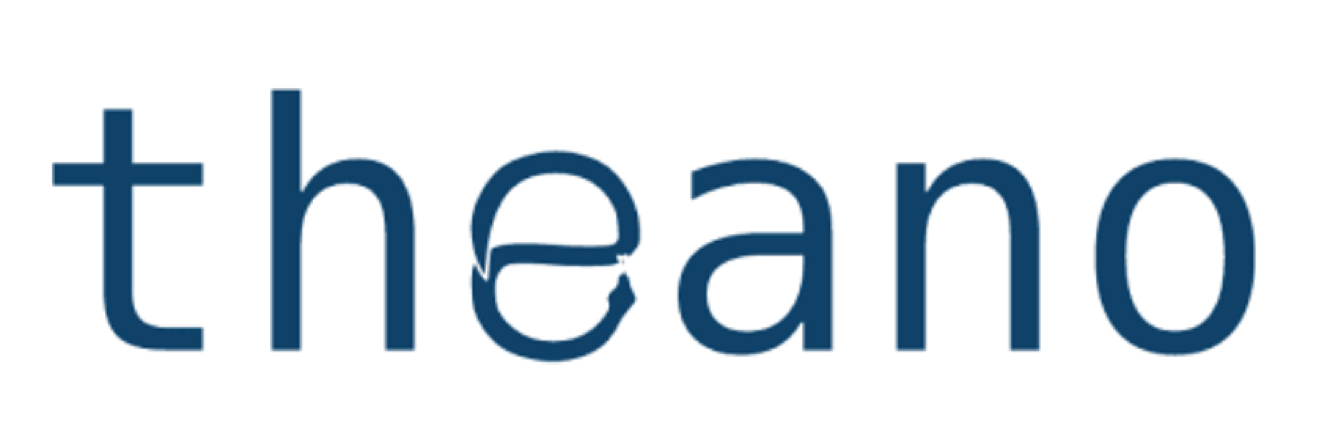

# **Theano**
 is a Python library and optimizing compiler for manipulating and evaluating mathematical expressions, especially matrix-valued ones. In Theano, computations are expressed using a NumPy-esque syntax and compiled to run efficiently on either CPU or GPU architectures

Conclusion. Theano is, therefore, a tool that optimizes and accelerates your computations in Deep Learning or Machine Learning based on a graph system that encompasses all computation steps. Despite its age, it is not outdated and deserves a place on the list of optimization libraries

Theano is basically a python library used to do mathematical calculations including multidimensional arrays in a very efficient manner. Majorly it is used in deep learning projects as these deep learning projects require so it works in a way that it is more faster in GPU rather than CPU

In [1]:
# !pip install theano
#!pip install Theano-PyMC


**Theano, a popular deep learning library,** is not officially supported in Google Colab. This is due to a number of factors, including:

**Compatibility issues**: Theano was developed several years ago and may not be compatible with the latest versions of Python, TensorFlow, and other libraries used in Colab.

**Performance limitations:** Theano can be slower than newer deep learning frameworks like TensorFlow and PyTorch, especially for large models.

**Maintenance:** Theano is no longer actively maintained, which means that it may not receive updates to address bugs or security vulnerabilities.

If you are looking for a deep learning framework to use in Google Colab, I recommend TensorFlow or PyTorch. These frameworks are well-supported, efficient, and have a large community of users.

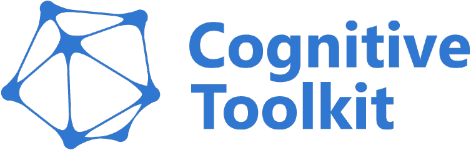

**Microsoft Cognitive Toolkit**, previously known as CNTK and sometimes styled as The Microsoft Cognitive Toolkit, is a deprecated deep learning framework developed by Microsoft Research. Microsoft Cognitive Toolkit describes neural networks as a series of computational steps via a directed graph

# **Caffe**

is a deep learning framework, originally developed at University of California, Berkeley. It is open source, under a BSD license. It is written in C++, with a Python interface

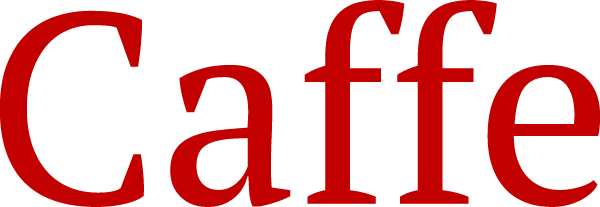

In [6]:
!pip install caffe